# Sheridan Kamal

## DATA 73500 - In Class Activity 4/6/20

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sb
import twitter as tw
import json
import math
import collections as cl
import matplotlib.pyplot as plt
import twitter as tw

In [2]:
CONSUMER_KEY = 'GDzHFRHpXG8GmazEa686SWrW8'
CONSUMER_SECRET = 'ugtGSyqQZWLxehCCJu7fBQxPquWai1grAaPVANeOC0EMZSUvF1'
OAUTH_TOKEN = '62099456-hWeDi3BLYTm6is402uqrMYUcdhZJD2DmVpUfDdiAw'
OAUTH_TOKEN_SECRET = 'nvys4S2sORvS13iWbQhW2QRZ5KXaJze5u8T5UlJVhdJkT'

auth = tw.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = tw.Twitter(auth=auth)

In [3]:
def twitter_search(twitter_api, q, max_results=200, **kw):

    search_results = twitter_api.search.tweets(q=q, count=100, **kw)
    
    statuses = search_results['statuses']
    
    max_results = min(1000, max_results)
    
    for _ in range(100): 
        try:
            next_results = search_results['search_metadata']['next_results']
        except KeyError as e: # No more results when next_results doesn't exist
            break
            
        kwargs = dict([ kv.split('=') 
                        for kv in next_results[1:].split("&") ])
        
        search_results = twitter_api.search.tweets(**kwargs)
        statuses += search_results['statuses']
        
        if len(statuses) > max_results: 
            break
            
    return statuses

In [4]:
q = '%23economy' 
tweet_data = twitter_search(twitter_api, q, max_results=1000)
tweet_df0 = pd.read_json(json.dumps(tweet_data))

q = '%23stockmarket' 
tweet_data = twitter_search(twitter_api, q, max_results=1000)
tweet_df1 = pd.read_json(json.dumps(tweet_data))

q = '%23pandemic' 
tweet_data = twitter_search(twitter_api, q, max_results=5000)
tweet_df2 = pd.read_json(json.dumps(tweet_data))

q = '%23socialdistancing' 
tweet_data = twitter_search(twitter_api, q, max_results=5000)
tweet_df2 = pd.read_json(json.dumps(tweet_data))

q = '%23onenewyork' 
tweet_data = twitter_search(twitter_api, q, max_results=5000)
tweet_df3 = pd.read_json(json.dumps(tweet_data))

tweet_df = pd.concat((tweet_df0, tweet_df1, tweet_df2, tweet_df3,), axis=0)
tweet_df = tweet_df[tweet_df['lang'] == 'en']

tweets = [ t.lower() 
         for tweet in tweet_df['text']
            for t in tweet.split('\n') ]

print(len(tweet_df))

358


In [5]:
words0 = [ w.lower() 
          for t in tweets 
             for w in t.split () 
        ]
words1 = [w for w in words0 if len(w) > 3]
words = set(words1)
print(sorted(words))
len(words)

['!!!🤩', '"big', '"donald', '"new', '"stupid"', '"the', '"trump\'s', '"what', '"why', '#10kgold', '#20lakhcrorepackage', '#20lakhcrores', '#aatmanirbharbharat', '#agrawalcorporate', '#alonetogether', '#alp', '#arunaroy', '#auspol', '#awareness.', '#bank', '#banking', '#banknifty', '#bankniftyfuture', '#banks', '#bartenderlife', '#bassoon', '#benefits', '#bhubaneswar', '#bhubaneswar.', '#billion…', '#birthday.', '#bitcoin', '#bjp', '#blackpeople', '#boredaf', '#brooklyn', '#business', '#buster', '#ca.', '#chandigarhpolice', '#charts', '#china', '#clapbecausewecarenyc', '#clapforourcarers', '#clapforourcarers…', '#clapforourkeyworkers', '#clapforthenhs', '#cleaning', '#cnbctv18market', '#concertmaster', '#coronavirus', '#coronavirusindi…', '#coronavirusnyc', '#coronaviruspandemic', '#coronavirus…', '#couriers', '#covid', '#covid19', '#covid19.', '#covid19art', '#covid19…', '#covid_19', '#covidapp', '#covidthoughts', '#covi…', '#cycling', '#daughter', '#democrats', '#de…', '#didyouknow', 

2076

In [6]:
Borough = set(['state', 'Queens', 'Brooklyn', 'Bronx', 'Manhattan', 'Staten Island'])
Virus = set(['COVID19', 'coronavirus', 'covid19', 'covid'])
Positivity = set(['family', 'friendship', 'zoom', 'corona_beer', 'support', 'solidarity', 'fellowship'
])
PPE = set(['respirator', 'gloves', 'mask', 'shield', 'respirator', 'icu'
])
Security = set(['protection', 'safeness', 'safety', 'secure', 'security'])

borough_terms_len = len(Borough.intersection(words))
virus_terms_len = len(Virus.intersection(words))
positive_terms_len = len(Positivity.intersection(words))
ppe_terms_len = len(PPE.intersection(words))
security_terms_len = len(Security.intersection(words))

illacts = [borough_terms_len, virus_terms_len, positive_terms_len, ppe_terms_len, security_terms_len]
print(illacts)

[1, 1, 3, 1, 1]


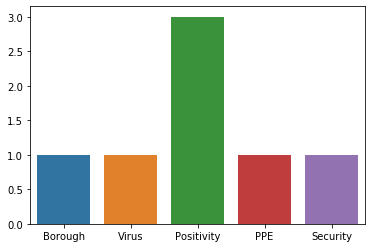

In [7]:
search_terms = ['Borough', 'Virus', 'Positivity', 'PPE', 'Security']

sb.barplot(x = search_terms, y = illacts)

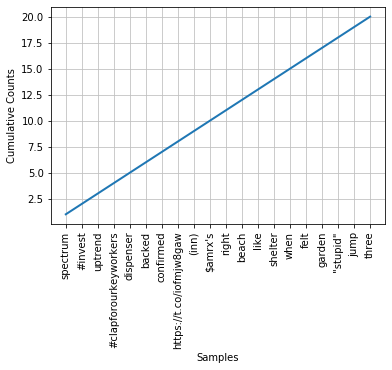

In [8]:
import nltk

q= nltk.FreqDist(words)
q.plot(20, cumulative=True)